## Group No

## Group Member Names:
1. Debarati Banerjee
2. Mrutyunjay Shukla
3. Tiasa Mukherjee
4. Rahul Kundu

## Journal used for the implemetation
Journal title: Wildlife surveillance using deep learning methods

Authors: Ruilong Chen, Ruth Littl, Lyudmila Mihaylova, Richard Delahay,Ruth Cox

Journal Name:Wiley

Year:2/25/2019

# 1. Import the required libraries

In [65]:
##---------Type the code below this line------------------##

from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import os



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Data Acquisition

For the problem identified by you, students have to find the data source themselves from any data source.

Provide the URL of the data used.

Write Code for converting the above downloaded data into a form suitable for DL



In [66]:
##---------Type the code below this line------------------##

class_paths = [
    "/content/drive/MyDrive/antelope",
    "/content/drive/MyDrive/bear",
    "/content/drive/MyDrive/bison",
    "/content/drive/MyDrive/cat",
    "/content/drive/MyDrive/elephant",
    "/content/drive/MyDrive/lion",
    "/content/drive/MyDrive/zebra"
]
all_image_paths = []
all_labels = []


# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

In [68]:
##---------Type the code below this line------------------##

## Split the data into training set and testing set
##---------Type the code below this line------------------##
# Split the data into training, testing, and validation sets
for label, class_path in enumerate(class_paths):
    image_paths = [os.path.join(class_path, img) for img in os.listdir(class_path)]
    all_image_paths.extend(image_paths)
    all_labels.extend([label] * len(image_paths))

# Split the dataset into training and validation sets
train_image_paths, val_image_paths, train_labels, val_labels = train_test_split(
    all_image_paths, all_labels, test_size=0.2, random_state=42
)

# Function to preprocess an image path and label
def preprocess_image(image_path, label):
    # Read and decode the image file
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    # Resize the image to your desired input size
    image = tf.image.resize(image, [224, 224])
    # Normalize pixel values to be between 0 and 1
    image = image / 255.0
    return image, label

## 4. Deep Neural Network Architecture


## 4.1 Design the architecture that you will be using

* CNN / RNN / Transformer as per the journal referenced



In [69]:
# Create TensorFlow datasets
batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((train_image_paths, train_labels))
train_dataset = train_dataset.map(preprocess_image)
train_dataset = train_dataset.shuffle(buffer_size=len(train_image_paths))
train_dataset = train_dataset.batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices((val_image_paths, val_labels))
val_dataset = val_dataset.map(preprocess_image)
val_dataset = val_dataset.batch(batch_size)

# CNN Architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(class_paths), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


## 4.2 DNN Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Total number of trainable parameters



# 5. Training the model


In [70]:

# Train the model
epochs = 10
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=val_dataset
)


Epoch 1/10
4/4 [==============================] - 12s 3s/step - loss: 5.2006 - accuracy: 0.1600 - val_loss: 2.5626 - val_accuracy: 0.3462
Epoch 2/10
4/4 [==============================] - 9s 2s/step - loss: 2.1612 - accuracy: 0.3300 - val_loss: 1.8213 - val_accuracy: 0.2692
Epoch 3/10
4/4 [==============================] - 9s 2s/step - loss: 1.5898 - accuracy: 0.4700 - val_loss: 1.5810 - val_accuracy: 0.4615
Epoch 4/10
4/4 [==============================] - 14s 3s/step - loss: 1.1745 - accuracy: 0.6700 - val_loss: 1.2860 - val_accuracy: 0.4615
Epoch 5/10
4/4 [==============================] - 11s 3s/step - loss: 0.7742 - accuracy: 0.7900 - val_loss: 1.0268 - val_accuracy: 0.5769
Epoch 6/10
4/4 [==============================] - 10s 2s/step - loss: 0.4826 - accuracy: 0.8900 - val_loss: 0.9169 - val_accuracy: 0.6538
Epoch 7/10
4/4 [==============================] - 10s 2s/step - loss: 0.2639 - accuracy: 0.9400 - val_loss: 0.8023 - val_accuracy: 0.6538
Epoch 8/10
4/4 [====================

# 6. Test the model


In [71]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


1/1 [==============================] - 0s 375ms/step - loss: 87.5136 - accuracy: 0.6154
Test Accuracy: 61.54%


# 7. Report the result

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


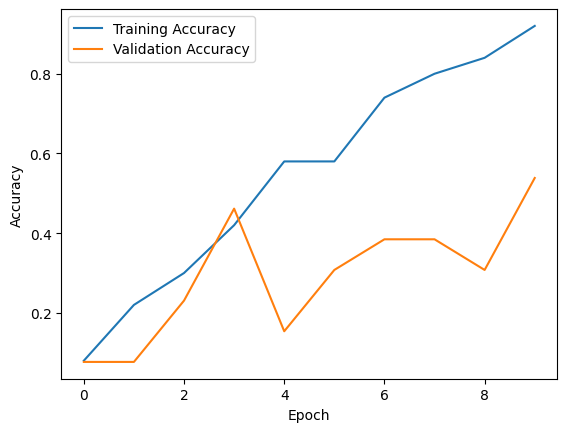

In [64]:
##---------Type the code below this line------------------##

##---------Type the code below this line------------------##

import matplotlib.pyplot as plt

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck